In [20]:
import pandas as pd

df = pd.read_excel("PCA db.xlsx", sheet_name="winter")


In [22]:
df.head()       # Shows the first five rows
df.info()       # Gives an overview of columns, data types, and non-null counts
df.describe()   # Provides summary statistics for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  428 non-null    object 
 1   PSSRa    428 non-null    float64
 2   PSSRb    428 non-null    float64
 3   RARSc    428 non-null    float64
 4   PSSRc    428 non-null    float64
 5   CARI     428 non-null    float64
dtypes: float64(5), object(1)
memory usage: 20.2+ KB


,PSSRa,PSSRb,RARSc,PSSRc,CARI
count,428.000000,428.000000,428.000000,428.000000,428.000000
mean,6.543619,5.620592,5.304991,5.334307,1.546201
std,1.628837,1.258628,1.131066,1.150535,0.353665
min,3.620865,3.185210,3.038123,3.019753,0.736208
25%,5.392493,4.747126,4.540540,4.555959,1.296024
50%,6.157062,5.470272,5.153627,5.168651,1.513292
75%,7.395219,6.387661,5.971130,6.062102,1.757582
max,12.239014,10.427906,9.524077,9.581117,2.758396


Free attempt - 5 indices - straightforward

Accuracy: 0.4069767441860465


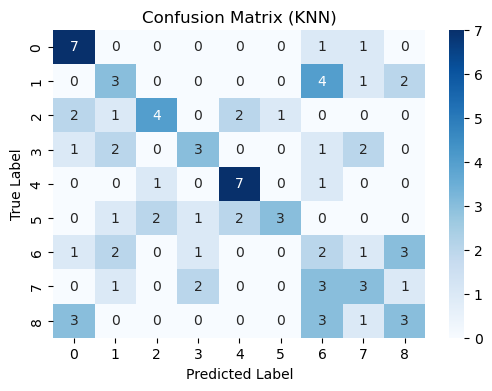

Confusion Matrix (Percentage):
             AVEFA     Barley      ECHCG        Oat      PAPRO      POLAV  \
AVEFA    77.777778   0.000000   0.000000   0.000000   0.000000   0.000000   
Barley    0.000000  30.000000   0.000000   0.000000   0.000000   0.000000   
ECHCG    20.000000  10.000000  40.000000   0.000000  20.000000  10.000000   
Oat      11.111111  22.222222   0.000000  33.333333   0.000000   0.000000   
PAPRO     0.000000   0.000000  11.111111   0.000000  77.777778   0.000000   
POLAV     0.000000  11.111111  22.222222  11.111111  22.222222  33.333333   
Wheat D  10.000000  20.000000   0.000000  10.000000   0.000000   0.000000   
Wheat I   0.000000  10.000000   0.000000  20.000000   0.000000   0.000000   
Wheat S  30.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

           Wheat D    Wheat I  Wheat S  
AVEFA    11.111111  11.111111      0.0  
Barley   40.000000  10.000000     20.0  
ECHCG     0.000000   0.000000      0.0  
Oat      11.111111  22.222222     

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Assuming 'df' is your DataFrame and 'species' is the target column.
# Here, X will be the features (all columns except 'species') and y will be the target.
X = df.drop("species", axis=1)
y = df["species"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

# Initialize and train the KNN classifier (here using 5 neighbors)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate the model
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

# Predict and compute the confusion matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (KNN)')
plt.show()

# Calculate the confusion matrix in percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
class_labels = np.unique(y_test)
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
print("Confusion Matrix (Percentage):")
print(cm_df)

# Note: KNN does not provide feature importances directly.
print("KNN does not provide feature importances directly, as it is a distance-based method.")


In [26]:
# Generate classification report for KNN
print("KNN Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

KNN Classification Report:
              precision    recall  f1-score   support

       AVEFA       0.50      0.78      0.61         9
      Barley       0.30      0.30      0.30        10
       ECHCG       0.57      0.40      0.47        10
         Oat       0.43      0.33      0.38         9
       PAPRO       0.64      0.78      0.70         9
       POLAV       0.75      0.33      0.46         9
     Wheat D       0.13      0.20      0.16        10
     Wheat I       0.33      0.30      0.32        10
     Wheat S       0.33      0.30      0.32        10

    accuracy                           0.41        86
   macro avg       0.44      0.41      0.41        86
weighted avg       0.44      0.41      0.41        86



In [13]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Example species lists
monocot_species = ["Barley", "Wheat D", "Wheat I", "Wheat S", "Oat", "AVEFA", "ECHCG"]  # example species
dicot_species   = ["PAPRO", "POLAV"]
weed_species    = ["AVEFA", "PAPRO", "POLAV", "ECHCG"]  # example of some species labeled as weeds
crop_species    = ["Barley", "Wheat D", "Wheat I", "Wheat S", "Oat"]

# Third-level species groups:
monocot_weed_species = ["AVEFA", "ECHCG"]
monocot_crop_species = ["Barley", "Wheat D", "Wheat I", "Wheat S", "Oat"]
dicot_weed_species   = ["PAPRO", "POLAV"]

# Assume df is your main DataFrame with features and a 'species' column.
# Create first-level category: 'monocot' vs 'dicot'
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')
# Create second-level category: 'weed' vs 'crop'
df['category2'] = df['species'].apply(lambda s: 'weed' if s in weed_species else 'crop')

# Features and targets
X = df[["PSSRa", "PSSRb", "RARSc", "PSSRc", "CARI"]]
y_cat1 = df["category1"]  # Level 1 target

# ---------------------------
# Level 1: Monocot vs Dicot Classification using KNN
# ---------------------------
X_train_cat1, X_test_cat1, y_train_cat1, y_test_cat1 = train_test_split(
    X, y_cat1, test_size=0.2, random_state=42, stratify=y_cat1
)
clf_cat1 = KNeighborsClassifier(n_neighbors=5)
clf_cat1.fit(X_train_cat1, y_train_cat1)
y_pred_cat1 = clf_cat1.predict(X_test_cat1)

# Split test data by predicted category1
X_test_monocot = X_test_cat1[y_pred_cat1 == 'monocot']
X_test_dicot   = X_test_cat1[y_pred_cat1 == 'dicot']

y_test_monocot = df.loc[X_test_monocot.index, 'category2']
y_test_dicot   = df.loc[X_test_dicot.index, 'category2']

# ---------------------------
# Level 2: Weed vs Crop Classification for each category
# For monocots:
monocot_mask = df['category1'] == 'monocot'
X_monocot = X[monocot_mask]
y_monocot = df['category2'][monocot_mask]
X_train_mono, X_val_mono, y_train_mono, y_val_mono = train_test_split(
    X_monocot, y_monocot, test_size=0.2, random_state=42, stratify=y_monocot
)
clf_cat2_monocot = KNeighborsClassifier(n_neighbors=5)
clf_cat2_monocot.fit(X_train_mono, y_train_mono)
y_pred_cat2_monocot = clf_cat2_monocot.predict(X_test_monocot)

# For dicots:
dicot_mask = df['category1'] == 'dicot'
X_dicot = X[dicot_mask]
y_dicot = df['category2'][dicot_mask]
X_train_di, X_val_di, y_train_di, y_val_di = train_test_split(
    X_dicot, y_dicot, test_size=0.2, random_state=42, stratify=y_dicot
)
clf_cat2_dicot = KNeighborsClassifier(n_neighbors=5)
clf_cat2_dicot.fit(X_train_di, y_train_di)
y_pred_cat2_dicot = clf_cat2_dicot.predict(X_test_dicot)

# ---------------------------
# Level 3: Species-Level Classification
# Train separate models for each final group:
# Monocot-Weed model
mono_weed_mask = (df['category1'] == 'monocot') & (df['category2'] == 'weed')
X_mono_weed = X[mono_weed_mask]
y_mono_weed = df['species'][mono_weed_mask]
clf_mono_weed = KNeighborsClassifier(n_neighbors=5)
clf_mono_weed.fit(X_mono_weed, y_mono_weed)

# Monocot-Crop model
mono_crop_mask = (df['category1'] == 'monocot') & (df['category2'] == 'crop')
X_mono_crop = X[mono_crop_mask]
y_mono_crop = df['species'][mono_crop_mask]
clf_mono_crop = KNeighborsClassifier(n_neighbors=5)
clf_mono_crop.fit(X_mono_crop, y_mono_crop)

# Dicot-Weed model
dicot_weed_mask = (df['category1'] == 'dicot') & (df['category2'] == 'weed')
X_dicot_weed = X[dicot_weed_mask]
y_dicot_weed = df['species'][dicot_weed_mask]
clf_dicot_weed = KNeighborsClassifier(n_neighbors=5)
clf_dicot_weed.fit(X_dicot_weed, y_dicot_weed)

# Dicot-Crop model (if applicable)
dicot_crop_mask = (df['category1'] == 'dicot') & (df['category2'] == 'crop')
X_dicot_crop = X[dicot_crop_mask]
y_dicot_crop = df['species'][dicot_crop_mask]

# Check if dicot_crop data exists
if len(X_dicot_crop) > 0:
    clf_dicot_crop = KNeighborsClassifier(n_neighbors=5)
    clf_dicot_crop.fit(X_dicot_crop, y_dicot_crop)
else:
    clf_dicot_crop = None  # Set to None if no data available


# ---------------------------
# Final Species-Level Prediction on Test Samples
# For each test sample, based on the predicted category1 and category2, choose the corresponding species-level classifier.
final_species_preds = []
for idx in X_test_cat1.index:
    cat1_pred = clf_cat1.predict(X_test_cat1.loc[[idx]])[0]
    if cat1_pred == 'monocot':
        cat2_pred = clf_cat2_monocot.predict(X_test_cat1.loc[[idx]])[0]
        if cat2_pred == 'weed':
            sp_pred = clf_mono_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_mono_crop.predict(X_test_cat1.loc[[idx]])[0]
    else:  # dicot
        cat2_pred = clf_cat2_dicot.predict(X_test_cat1.loc[[idx]])[0]
        if cat2_pred == 'weed':
            sp_pred = clf_dicot_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            if clf_dicot_crop is None:
                # Handle the case where there's no dicot crop classifier
                sp_pred = "unknown"  # or handle this case as needed
            else:
                sp_pred = clf_dicot_crop.predict(X_test_cat1.loc[[idx]])[0]
    final_species_preds.append(sp_pred)

final_species_preds = np.array(final_species_preds)
y_test_species = df.loc[X_test_cat1.index, 'species']

final_accuracy = accuracy_score(y_test_species, final_species_preds)
print("Final Species-Level Accuracy:", final_accuracy)

# Compute confusion matrix in percentages:
cm = confusion_matrix(y_test_species, final_species_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
class_labels = np.unique(y_test_species)
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
print("Confusion Matrix (Percentage):")
print(cm_df)


Final Species-Level Accuracy: 0.6511627906976745
Confusion Matrix (Percentage):
             AVEFA     Barley      ECHCG        Oat      PAPRO      POLAV  \
AVEFA    66.666667  11.111111   0.000000   0.000000   0.000000   0.000000   
Barley   14.285714  85.714286   0.000000   0.000000   0.000000   0.000000   
ECHCG     0.000000  12.500000  75.000000   0.000000   0.000000   0.000000   
Oat       9.090909   9.090909   0.000000  54.545455   0.000000   0.000000   
PAPRO     0.000000   0.000000  18.181818   0.000000  81.818182   0.000000   
POLAV    12.500000   0.000000   0.000000   0.000000  25.000000  62.500000   
Wheat D   0.000000  27.777778   0.000000   0.000000   0.000000   5.555556   
Wheat I   0.000000   0.000000   0.000000   0.000000   0.000000  11.111111   
Wheat S   0.000000  20.000000   0.000000   0.000000   0.000000   0.000000   

           Wheat D    Wheat I    Wheat S  
AVEFA     0.000000   0.000000  22.222222  
Barley    0.000000   0.000000   0.000000  
ECHCG     0.000000  

In [15]:
# Generate classification report for KNN
print("KNN Classification Report:")
print(classification_report(y_test_species, final_species_preds, zero_division=0))

KNN Classification Report:
              precision    recall  f1-score   support

       AVEFA       0.67      0.67      0.67         9
      Barley       0.40      0.86      0.55         7
       ECHCG       0.75      0.75      0.75         8
         Oat       1.00      0.55      0.71        11
       PAPRO       0.82      0.82      0.82        11
       POLAV       0.71      0.62      0.67         8
     Wheat D       0.69      0.61      0.65        18
     Wheat I       0.75      0.67      0.71         9
     Wheat S       0.17      0.20      0.18         5

    accuracy                           0.65        86
   macro avg       0.66      0.64      0.63        86
weighted avg       0.70      0.65      0.66        86



Accuracy: 0.41237113402061853


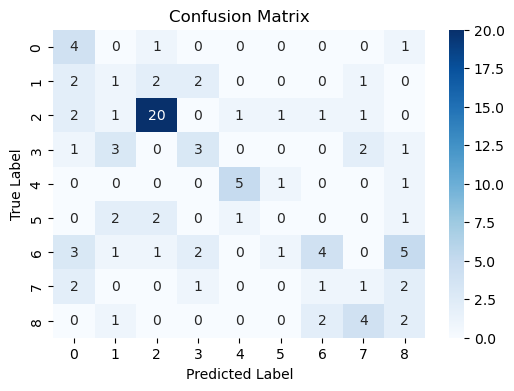

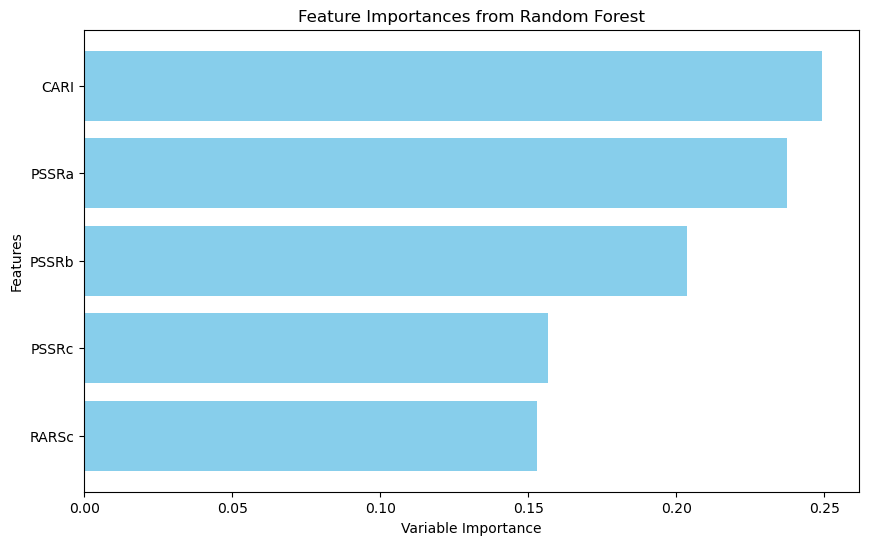

,AVEFA,Barley,ECHCG,Oat,PAPRO,POLAV,Wheat D,Wheat I,Wheat S
AVEFA,66.666667,0.000000,16.666667,0.000000,0.000000,0.000000,0.000000,0.000000,16.666667
Barley,25.000000,12.500000,25.000000,25.000000,0.000000,0.000000,0.000000,12.500000,0.000000
ECHCG,7.407407,3.703704,74.074074,0.000000,3.703704,3.703704,3.703704,3.703704,0.000000
Oat,10.000000,30.000000,0.000000,30.000000,0.000000,0.000000,0.000000,20.000000,10.000000
PAPRO,0.000000,0.000000,0.000000,0.000000,71.428571,14.285714,0.000000,0.000000,14.285714
POLAV,0.000000,33.333333,33.333333,0.000000,16.666667,0.000000,0.000000,0.000000,16.666667
Wheat D,17.647059,5.882353,5.882353,11.764706,0.000000,5.882353,23.529412,0.000000,29.411765
Wheat I,28.571429,0.000000,0.000000,14.285714,0.000000,0.000000,14.285714,14.285714,28.571429
Wheat S,0.000000,11.111111,0.000000,0.000000,0.000000,0.000000,22.222222,44.444444,22.222222


In [51]:
# Assuming 'df' is your DataFrame and 'target' is the name of your target column:
X = df[["PSSRa","PSSRb","RARSc","PSSRc","CARI"]]  # Features
y = df["species"]               # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Variable Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

cm_df

Is grid search even necessary if the result is no good?

Define the terms for 3 step classification

In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example lists of species for each category
monocot_species = ["Barley","Wheat D","Wheat I","Wheat S","Oat","AVEFA","ECHCG"]  # example species
dicot_species   = ["PAPRO","POLAV"]
weed_species    = ["AVEFA","PAPRO","POLAV","ECHCG"]  # example of some species labeled as weeds
crop_species    = ["Barley","Wheat D","Wheat I","Wheat S","Oat"]

# Third-level species groups (adjust these depending on your actual data):
monocot_weed_species = ["AVEFA","ECHCG"]
monocot_crop_species = [ "Barley","Wheat D","Wheat I","Wheat S","Oat"]
dicot_weed_species   = ["PAPRO","POLAV"]

# Assume df is your main dataframe with features and species
# Example:
# df = pd.read_csv("your_data.csv")

# Create first-level category
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')
# Create second-level category
df['category2'] = df['species'].apply(lambda s: 'weed' if s in weed_species else 'crop')

print(df[['category1', 'category2']].value_counts())

category1  category2
monocot    crop         239
           weed          96
dicot      weed          93
Name: count, dtype: int64


Level 1: Monocot vs Dicot 

In [18]:
# Features and target
X = df[["PSSRa", "PSSRb", "RARSc", "PSSRc", "CARI"]]
y_cat1 = df["category1"]  # Level 1 target
# Level 1: Monocot vs Dicot
X_train_cat1, X_test_cat1, y_train_cat1, y_test_cat1 = train_test_split(X, y_cat1, test_size=0.2, random_state=42, stratify=y_cat1)
clf_cat1 = RandomForestClassifier(random_state=42)
clf_cat1.fit(X_train_cat1, y_train_cat1)

y_pred_cat1 = clf_cat1.predict(X_test_cat1)


In [22]:
#gridsearch level 1
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#gridsearch
from sklearn.model_selection import GridSearchCV
# Define a dictionary with the hyperparameters you wish to tune:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=clf_cat1,param_grid=param_grid)
grid_search.fit(X_train_cat1, y_train_cat1)
# Option 1: Use the best estimator from GridSearchCV
final_model = grid_search.best_estimator_

# Now you can use final_model to predict on new data:
predictions = final_model.predict(X_test_cat1)

In [24]:
# Print out the best parameters and the best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score: 0.8682438192668371


In [28]:
from sklearn.metrics import classification_report
clf_cat1 = RandomForestClassifier(random_state=42, 
                                  max_depth=10,
                                  min_samples_leaf=2,
                                  min_samples_split=2,
                                  n_estimators=100)
clf_cat1.fit(X_train_cat1, y_train_cat1)

y_pred_cat1 = clf_cat1.predict(X_test_cat1)
# Generate and print the classification report
report = classification_report(y_test_cat1, y_pred_cat1)
print(report)

              precision    recall  f1-score   support

       dicot       0.71      0.63      0.67        19
     monocot       0.90      0.93      0.91        67

    accuracy                           0.86        86
   macro avg       0.80      0.78      0.79        86
weighted avg       0.86      0.86      0.86        86



In [32]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred_cat1 = clf_cat1.predict(X_test_cat1)
cm = confusion_matrix(y_test_cat1, y_pred_cat1)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test_cat1)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

,dicot,monocot
dicot,63.157895,36.842105
monocot,7.462687,92.537313


In [34]:
# Split test data by predicted category1
X_test_monocot = X_test_cat1[y_pred_cat1 == 'monocot']
X_test_dicot   = X_test_cat1[y_pred_cat1 == 'dicot']

y_test_monocot = df.loc[X_test_monocot.index, 'category2']
y_test_dicot   = df.loc[X_test_dicot.index, 'category2']


In [36]:
# Level 2: Weed vs Crop (for monocot)
monocot_mask = df['category1'] == 'monocot'
X_monocot = X[monocot_mask]
y_monocot = df['category2'][monocot_mask]

X_train_mono, X_val_mono, y_train_mono, y_val_mono = train_test_split(X_monocot, y_monocot, test_size=0.2, random_state=42, stratify=y_monocot)
clf_cat2_monocot = RandomForestClassifier(random_state=42)
clf_cat2_monocot.fit(X_train_mono, y_train_mono)

y_pred_cat2_monocot = clf_cat2_monocot.predict(X_test_monocot)

In [1]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=clf_cat2_monocot,param_grid=param_grid)
grid_search.fit(X_train_mono, y_train_mono)
# Option 1: Use the best estimator from GridSearchCV
final_model = grid_search.best_estimator_

# Now you can use final_model to predict on new data:
predictions = final_model.predict(X_test_monocot)

NameError: name 'GridSearchCV' is not defined

In [48]:
# Print out the best parameters and the best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 0.8543675751222921


In [66]:
clf_cat2_monocot = RandomForestClassifier(random_state=42, 
                                  max_depth=None,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  n_estimators=200)
clf_cat2_monocot.fit(X_train_mono, y_train_mono)

y_pred_cat2_monocot = clf_cat2_monocot.predict(X_test_monocot)
# Generate and print the classification report
report = classification_report(y_test_monocot, y_pred_cat2_monocot)
print(report)

              precision    recall  f1-score   support

        crop       0.90      1.00      0.95        47
        weed       1.00      0.77      0.87        22

    accuracy                           0.93        69
   macro avg       0.95      0.89      0.91        69
weighted avg       0.93      0.93      0.92        69



In [72]:
y_pred_cat2_monocot = clf_cat2_monocot.predict(X_test_monocot)
cm = confusion_matrix(y_test_monocot, y_pred_cat2_monocot)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test_monocot)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

,crop,weed
crop,100.000000,0.000000
weed,22.727273,77.272727


In [74]:
# Level 2: Weed vs Crop (for dicot)
dicot_mask = df['category1'] == 'dicot'
X_dicot = X[dicot_mask]
y_dicot = df['category2'][dicot_mask]

X_train_di, X_val_di, y_train_di, y_val_di = train_test_split(X_dicot, y_dicot, test_size=0.2, random_state=42, stratify=y_dicot)
clf_cat2_dicot = RandomForestClassifier(random_state=42)
clf_cat2_dicot.fit(X_train_di, y_train_di)

y_pred_cat2_dicot = clf_cat2_dicot.predict(X_test_dicot)


In [78]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=clf_cat2_dicot,param_grid=param_grid)
grid_search.fit(X_train_di, y_train_di)
# Option 1: Use the best estimator from GridSearchCV
final_model = grid_search.best_estimator_

# Now you can use final_model to predict on new data:
predictions = final_model.predict(X_test_dicot)

In [80]:
# Print out the best parameters and the best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score: 1.0


In [88]:
clf_cat2_dicot = RandomForestClassifier(random_state=42, 
                                  max_depth=None,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  n_estimators=100)
clf_cat2_dicot.fit(X_train_di, y_train_di)

y_pred_cat2_dicot = clf_cat2_dicot.predict(X_test_dicot)
# Generate and print the classification report
report = classification_report(y_test_dicot, y_pred_cat2_dicot)
print(report)

              precision    recall  f1-score   support

        crop       0.00      0.00      0.00         3
        weed       0.82      1.00      0.90        14

    accuracy                           0.82        17
   macro avg       0.41      0.50      0.45        17
weighted avg       0.68      0.82      0.74        17



/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [90]:
y_pred_cat2_dicot = clf_cat2_dicot.predict(X_test_dicot)
cm = confusion_matrix(y_test_dicot, y_pred_cat2_dicot)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test_dicot)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

,crop,weed
crop,0.0,100.0
weed,0.0,100.0


In [94]:
# Example: Monocot-Weed model (if multiple species in that group)
mono_weed_mask = (df['category1'] == 'monocot') & (df['category2'] == 'weed')
X_mono_weed = X[mono_weed_mask]
y_mono_weed = df['species'][mono_weed_mask]

clf_mono_weed = RandomForestClassifier(random_state=42)
clf_mono_weed.fit(X_mono_weed, y_mono_weed)

# Monocot-Crop model
mono_crop_mask = (df['category1'] == 'monocot') & (df['category2'] == 'crop')
X_mono_crop = X[mono_crop_mask]
y_mono_crop = df['species'][mono_crop_mask]

clf_mono_crop = RandomForestClassifier(random_state=42)
clf_mono_crop.fit(X_mono_crop, y_mono_crop)

# Dicot-Weed model
dicot_weed_mask = (df['category1'] == 'dicot') & (df['category2'] == 'weed')
X_dicot_weed = X[dicot_weed_mask]
y_dicot_weed = df['species'][dicot_weed_mask]

clf_dicot_weed = RandomForestClassifier(random_state=42)
clf_dicot_weed.fit(X_dicot_weed, y_dicot_weed)

# Dicot-Crop model
###dicot_crop_mask = (df['category1'] == 'dicot') & (df['category2'] == 'crop')
###X_dicot_crop = X[dicot_crop_mask]
###y_dicot_crop = df['species'][dicot_crop_mask]

###clf_dicot_crop = RandomForestClassifier(random_state=42)
###clf_dicot_crop.fit(X_dicot_crop, y_dicot_crop)

RandomForestClassifier(random_state=42)

In [97]:
final_species_preds = []

for idx in X_test_cat1.index:
    cat1_pred = clf_cat1.predict(X_test_cat1.loc[[idx]])[0]
    if cat1_pred == 'monocot':
        cat2_pred = clf_cat2_monocot.predict(X_test_cat1.loc[[idx]])[0]  # use monocot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_mono_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_mono_crop.predict(X_test_cat1.loc[[idx]])[0]
    else:  # dicot
        cat2_pred = clf_cat2_dicot.predict(X_test_cat1.loc[[idx]])[0]  # use dicot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_dicot_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_dicot_crop.predict(X_test_cat1.loc[[idx]])[0]

    final_species_preds.append(sp_pred)

final_species_preds = np.array(final_species_preds)
y_test_species = df.loc[X_test_cat1.index, 'species']

In [100]:
# Evaluate accuracy of final species predictions:
final_accuracy = accuracy_score(y_test_species, final_species_preds)
print("Final Species-Level Accuracy:", final_accuracy)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_species,final_species_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test_species)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df


Final Species-Level Accuracy: 0.8372093023255814


,AVEFA,Barley,ECHCG,Oat,PAPRO,POLAV,Wheat D,Wheat I,Wheat S
AVEFA,77.777778,11.111111,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,11.111111
Barley,0.000000,100.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
ECHCG,0.000000,0.000000,75.000000,0.0,25.000000,0.000000,0.000000,0.000000,0.000000
Oat,0.000000,0.000000,0.000000,100.0,0.000000,0.000000,0.000000,0.000000,0.000000
PAPRO,0.000000,0.000000,36.363636,0.0,63.636364,0.000000,0.000000,0.000000,0.000000
POLAV,0.000000,25.000000,0.000000,0.0,0.000000,62.500000,0.000000,0.000000,12.500000
Wheat D,0.000000,0.000000,0.000000,0.0,5.555556,5.555556,88.888889,0.000000,0.000000
Wheat I,0.000000,0.000000,0.000000,0.0,11.111111,0.000000,0.000000,88.888889,0.000000
Wheat S,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,100.000000
